<img src="https://www.unipa.it/.content/immagini/unipa_default.jpg" width="250" height="300">
<h1 style="text-align:center; color:blue">Master in Data Science and Big Data Analytics </h1>
<h3 style="text-align:center">Progetto Python</h3>
<h4 style="text-align:center">di Maiorino GIORDANO</h4>

Il progetto fornisce una serie di opzionalità per analizzare l'andamento del COVID-19 in Italia recuperando il dataset tramite le API di Kaggle. 

In [1]:
from itacovid import *

Dopo essersi registrati su www.kaggle.com e dopo averlo installato, senza dover copiare il file kaggle.json con le propire API nell'apposita directory come da istruzioni, è sufficiente utilizzare la seguente funzione per loggarsi al servizio:<br>
_my_kaggle_api('my_username', 'my_key')_

<h5 style="color:#bd850d">Ovviamente tale funzione opzionale non è necessaria se il file kaggle.json è stato regolarmente posizionato come indicato sul sito del produttore</h5>

In [2]:
#my_kaggle_api('my_username', 'my_key')

La seguente funzione effettua il download del dataset prendendo come parametri opzionali il percorso e il nome che si vuole assegnare allo stesso, ad esempio:<br>
_download_covid_dataset(path='/Users/nome_utente/Desktop', name='my_dataset')_

In [3]:
#download_covid_dataset(path='/Users/nome_utente/Desktop', name='my_dataset')

In [4]:
download_covid_dataset()

Con la funzione:<br>
_read_covid_dataset(path='/Users/nome_utente/Desktop', name='my_dataset')_ <br>
è possibile assegnare ad una variabile il dataset scaricato

In [5]:
#total_covid_df = read_covid_dataset(path='/Users/nome_utente/Desktop', name='my_dataset.csv')

In [6]:
total_covid_df = read_covid_dataset()

Tramite l'oggetto <b>_"analyzer"_</b> (già istanziato tramite l'import del pacchetto) è possibile memorizzazione permanentemente la configurazione per l’accesso al file csv con i risultati delle analisi settando i seguenti attributi:
1. _analyzer.path_to_results_
2. _analyzer.name_to_results_

se non vengono definiti, è possibile comunque chimare il metodo _"analyzer.store_config()"_ per generare il file nascosto config.json con la configurazione di default.

Esempio:

In [7]:
#analyzer.path_to_results='/Users/nome_utente/Desktop/result'
#analyzer.name_to_results='risultati-covid19'
analyzer.store_config()

Se si posside già un file config.json è possibile caricare in memoria il contenuto tramite il seguente comando:<br>
_analyzer.load_config()_

In [8]:
#analyzer.load_config()

È possibile selezionare diversi sottoinsiemi di dati a partire dal dataset in base a:
1. Nome delle regioni d'interesse;
2. Mese/i d'interesse;
3. Periodo d'interesse;

In [9]:
regioni_df=subset_by_region(total_covid_df, 'Veneto', 'piemonte')

In [10]:
regioni_df

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,casi_testati,variazione_totale_positivi
sno,,,,,,,,,,,,,
12,2020-02-24 18:00:00,Piemonte,2,0,2,1,3,3,0,0,3,0,0
20,2020-02-24 18:00:00,Veneto,12,4,16,16,32,32,0,1,33,0,0
33,2020-02-25 18:00:00,Piemonte,2,0,2,1,3,0,0,0,3,0,0
41,2020-02-25 18:00:00,Veneto,12,7,19,23,42,10,0,1,43,0,10
54,2020-02-26 18:00:00,Piemonte,2,0,2,1,3,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,2020-06-26 17:00:00,Veneto,16,1,17,470,487,5,16768,2007,19262,398960,-40
2616,2020-06-27 17:00:00,Piemonte,303,12,315,1188,1503,11,25739,4080,31322,255473,-82
2624,2020-06-27 17:00:00,Veneto,18,1,19,463,482,2,16775,2007,19264,403556,-5


<h4 style="color:#cf152a">Prova di errore!</h4>

I nomi delle regioni non sono _case sensitive_ ma se viene inserito un nome errato darà errore

In [11]:
subset_by_region(total_covid_df, 'italia', 'belgio')

RegionError: Uno o più nomi di Regione inseriti non sono corretti! Per favore inserisci uno o più dei seguenti nomi:
['Abruzzo' 'Basilicata' 'P.a. bolzano' 'Calabria' 'Campania'
 'Emilia-romagna' 'Friuli venezia giulia' 'Lazio' 'Liguria' 'Lombardia'
 'Marche' 'Molise' 'Piemonte' 'Puglia' 'Sardegna' 'Sicilia' 'Toscana'
 'P.a. trento' 'Umbria' "Valle d'aosta" 'Veneto']

In [12]:
mesi_df=subset_by_month(total_covid_df, 'aprile')

In [13]:
mesi_df

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,casi_testati,variazione_totale_positivi
sno,,,,,,,,,,,,,
777,2020-04-01 17:00:00,Abruzzo,342,71,413,798,1211,35,102,123,1436,0,20
778,2020-04-01 17:00:00,Basilicata,39,15,54,171,225,11,3,9,237,0,9
779,2020-04-01 17:00:00,P.a. bolzano,269,57,326,786,1112,47,190,116,1418,0,-30
780,2020-04-01 17:00:00,Calabria,144,16,160,450,610,10,21,38,669,0,4
781,2020-04-01 17:00:00,Campania,478,129,607,1369,1976,139,107,148,2231,0,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,2020-04-30 17:00:00,Toscana,546,126,672,4912,5584,60,2926,842,9352,108596,-79
1403,2020-04-30 17:00:00,P.a. trento,158,21,179,1191,1370,47,2328,418,4116,21622,-93
1404,2020-04-30 17:00:00,Umbria,68,16,84,149,233,1,1092,67,1392,25317,-28


<h4 style="color:#cf152a">Prova di errore!</h4>

I nomi dei mesi non sono _case sensitive_ ma se viene inserito un nome errato darà errore

In [14]:
subset_by_month(total_covid_df, 'estate', 'inverno')

MonthError: Uno o più nomi di mesi inseriti non sono corretti! Per favore inserisci correttamente i mesi in italiano

In [15]:
periodo_df=subset_by_period(total_covid_df, '19/05/2020', '01/06/2020')

In [16]:
periodo_df

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,casi_testati,variazione_totale_positivi
sno,,,,,,,,,,,,,
1785,2020-05-19 17:00:00,Abruzzo,188,6,194,1195,1389,4,1419,389,3197,41162,-24
1786,2020-05-19 17:00:00,Basilicata,26,1,27,57,84,1,282,27,393,22767,-9
1787,2020-05-19 17:00:00,P.a. bolzano,46,6,52,256,308,5,1988,291,2587,25263,1
1788,2020-05-19 17:00:00,Calabria,50,2,52,330,382,2,676,95,1153,55270,-19
1789,2020-05-19 17:00:00,Campania,330,17,347,1171,1518,12,2790,399,4707,69264,-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2074,2020-06-01 17:00:00,Toscana,85,25,110,972,1082,3,7977,1048,10107,180233,-29
2075,2020-06-01 17:00:00,P.a. trento,14,3,17,276,293,2,3677,462,4432,48853,-11
2076,2020-06-01 17:00:00,Umbria,15,2,17,14,31,0,1324,76,1431,50790,0


<h4 style="color:#cf152a">Prova di errore!</h4>

Se viene inserita una data fuori dal _range_ restituirà un errore

In [17]:
subset_by_period(total_covid_df, '15/02/2020', '01/06/2020')

PeriodError: Le date inserite sono fuori intervallo!
Inserisci una data compresa tra il 24/02/2020 e il 28/06/2020

<h4 style="color:#5f9114">Attenzione! È possibile effettuare anche una combo delle tre funzioni.</h4>
Ad Esempio:

In [18]:
combo_df=subset_by_month(subset_by_region(total_covid_df, 'Veneto', 'piemonte'), 'aprile', 'Maggio')

In [19]:
combo_df

,data,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,casi_testati,variazione_totale_positivi
sno,,,,,,,,,,,,,
789,2020-04-01 17:00:00,Piemonte,3146,453,3599,4871,8470,494,439,886,9795,0,388
797,2020-04-01 17:00:00,Veneto,1718,350,2068,6156,8224,470,902,499,9625,0,374
810,2020-04-02 17:00:00,Piemonte,3341,453,3794,5005,8799,558,571,983,10353,0,329
818,2020-04-02 17:00:00,Veneto,1670,345,2015,6563,8578,486,1001,532,10111,0,354
831,2020-04-03 17:00:00,Piemonte,3300,452,3752,5378,9130,543,723,1043,10896,0,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2020-05-29 17:00:00,Veneto,137,7,144,1705,1849,9,15379,1906,19134,326795,-176
2028,2020-05-30 17:00:00,Piemonte,988,60,1048,4242,5290,82,21435,3858,30583,205102,-368
2036,2020-05-30 17:00:00,Veneto,120,7,127,1485,1612,12,15618,1916,19146,331390,-237


Per effettuare una semplice analisi sul sottoinsieme di dati selezionati come visto precedentmente, tramite l'oggetto analyzer, basta semplicemente richiamare il metodo analyze passandoli in input il dataframe. Ad esempio:<br>
_analyzer.analyze(regioni_df)_

Il risultato di tale metodo è dizionario con i contenuti delle analisi, ovvero: valori minimi e massimi, media e deviazione standard.

In [20]:
dict_con_risultati=analyzer.analyze(regioni_df)

Utilizzare poi il seguente metodo per effettuarne la stampa

In [21]:
analyzer.print_results(dict_con_risultati)

{'Piemonte': {'deviazione standard': {'casi_testati': 98373.60209918745,
                                      'deceduti': 1588.4721372618226,
                                      'dimessi_guariti': 9793.661958196666,
                                      'isolamento_domiciliare': 4431.622605013862,
                                      'nuovi_positivi': 254.16792149573152,
                                      'ricoverati_con_sintomi': 1199.5065101949226,
                                      'terapia_intensiva': 149.7072800978153,
                                      'totale_casi': 12195.69889492011,
                                      'totale_ospedalizzati': 1337.2569692150742,
                                      'totale_positivi': 5420.240048904294},
              'valori massimi': {'casi_testati': 257049,
                                 'deceduti': 4085,
                                 'dimessi_guariti': 25756,
                                 'isolamento_domiciliare': 130

In [22]:
secondo_dict_con_risultati=analyzer.analyze(periodo_df)

In [23]:
analyzer.print_results(secondo_dict_con_risultati)

{'Abruzzo': {'deviazione standard': {'casi_testati': 3466.902313067337,
                                     'deceduti': 6.135825262208145,
                                     'dimessi_guariti': 235.7889259113277,
                                     'isolamento_domiciliare': 202.19608859163978,
                                     'nuovi_positivi': 2.972400517286464,
                                     'ricoverati_con_sintomi': 25.952196121262716,
                                     'terapia_intensiva': 1.2403473458920846,
                                     'totale_casi': 14.35595369849759,
                                     'totale_ospedalizzati': 26.558664073379845,
                                     'totale_positivi': 227.8270623294571},
             'valori massimi': {'casi_testati': 52646,
                                'deceduti': 408,
                                'dimessi_guariti': 2093,
                                'isolamento_domiciliare': 1195,
              

Per salvare i risultati dell'analisi utilizzare il seguente metodo:<br>
_analyzer.save_results(dictionary_name)_<br>
che come si può vedere prende in input il dizionario con i risultati.
I risultati verranno memorizzati in un file csv il cui percorso e nome sono stati definiti precedentemte dall'utente, altrimenti utilizzerà percorso e nome di default.
A ciascuna entry sarà associato un identificatore univoco con il timestamp della memorizzazione o un identificatore passato come argomento opzionale dall’utente; anch'esso dovrà essere univoco.

In [24]:
analyzer.save_results(dict_con_risultati)

Salvataggio riuscito correttamente!


In [25]:
analyzer.load_results()

ricoverati_con_sintomi  \
                                                                    valori massimi   
unique_identification      periodo                 regioni                           
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte                 3553.0   
                                                   Veneto                   1718.0   

                                                                           \
                                                            valori minimi   
unique_identification      periodo                 regioni                  
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte           2.0   
                                                   Veneto            12.0   

                                                                          \
                                                             valori medi   
unique_identification      periodo                 regioni                 
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte  1620.833333   
                                                   Veneto     617.031746   

                                                                                 \
                                                            deviazione standard   
unique_identification      periodo                 regioni                        
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte          1199.50651   
                                                   Veneto             595.01610   

                                                            terapia_intensiva  \
                                                               valori massimi   
unique_identification      periodo                 regioni                      
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte             453.0   
                                                   Veneto               356.0   

                                                                           \
                                                            valori minimi   
unique_identification      periodo                 regioni                  
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte           0.0   
                                                   Veneto             0.0   

                                                                         \
                                                            valori medi   
unique_identification      periodo                 regioni                
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte  165.047619   
                                                   Veneto    104.658730   

                                                                                 \
                                                            deviazione standard   
unique_identification      periodo                 regioni                        
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte           149.70728   
                                                   Veneto             117.22622   

                                                            totale_ospedalizzati  \
                                                                  valori massimi   
unique_identification      periodo                 regioni                         
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte               3985.0   
                                                   Veneto                 2068.0   

                                                                           \
                                                            valori minimi   
unique_identification      periodo                 regioni                  
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte           2.0   
                                                   Veneto            16.0   

                                                       

In [26]:
analyzer.save_results(dict_con_risultati, 'mio salvataggio')

Salvataggio riuscito correttamente!


In [27]:
analyzer.load_results()

ricoverati_con_sintomi  \
                                                                    valori massimi   
unique_identification      periodo                 regioni                           
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte                 3553.0   
                                                   Veneto                   1718.0   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte                 3553.0   
                                                   Veneto                   1718.0   

                                                                           \
                                                            valori minimi   
unique_identification      periodo                 regioni                  
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte           2.0   
                                                   Veneto            12.0   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte           2.0   
                                                   Veneto            12.0   

                                                                          \
                                                             valori medi   
unique_identification      periodo                 regioni                 
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte  1620.833333   
                                                   Veneto     617.031746   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte  1620.833333   
                                                   Veneto     617.031746   

                                                                                 \
                                                            deviazione standard   
unique_identification      periodo                 regioni                        
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte          1199.50651   
                                                   Veneto             595.01610   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte          1199.50651   
                                                   Veneto             595.01610   

                                                            terapia_intensiva  \
                                                               valori massimi   
unique_identification      periodo                 regioni                      
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte             453.0   
                                                   Veneto               356.0   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte             453.0   
                                                   Veneto               356.0   

                                                                           \
                                                            valori minimi   
unique_identification      periodo                 regioni                  
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte           0.0   
                                                   Veneto             0.0   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte           0.0   
                                                   Veneto             0.0   

                                                                         \
                                                            valori medi   
unique_identification      periodo                 regioni                
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte  165.047619   
                                                   Veneto    104.658730   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte  165.047619   
                                                   Veneto    104.658730   

                                                                                 \
                                                            deviazione standard   
un

<h4 style="color:#cf152a">Attenzione! Se si inserisce nuovamente la stessa stringa comarirà un messaggio di errore.</h4>
Ad Esempio:

In [28]:
analyzer.save_results(secondo_dict_con_risultati, 'mio salvataggio')

Hai inserito un valore già esistente!
L'identificativo perl memorizzazione deve essere univoco o comunque diverso dall'header.
Si consiglia di utilizzare i valori di default.


In [29]:
analyzer.save_results(secondo_dict_con_risultati)

Salvataggio riuscito correttamente!


In [30]:
analyzer.load_results()

ricoverati_con_sintomi  \
                                                                                 valori massimi   
unique_identification      periodo                 regioni                                        
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte                              3553.0   
                                                   Veneto                                1718.0   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte                              3553.0   
                                                   Veneto                                1718.0   
2020-07-02 00:00:54.299744 01/06/2020 - 19/05/2020 Abruzzo                                188.0   
                                                   Basilicata                              26.0   
                                                   P.a. bolzano                            50.0   
                                                   Calabria                                50.0   
                                                   Campania                               330.0   
                                                   Emilia-romagna                         670.0   
                                                   Friuli venezia giulia                   76.0   
                                                   Lazio                                 1124.0   
                                                   Liguria                                338.0   
                                                   Lombardia                             4426.0   
                                                   Marche                                 144.0   
                                                   Molise                                   9.0   
                                                   Piemonte                              1579.0   
                                                   Puglia                                 247.0   
                                                   Sardegna                                71.0   
                                                   Sicilia                                125.0   
                                                   Toscana                                190.0   
                                                   P.a. trento                             42.0   
                                                   Umbria                                  25.0   
                                                   Valle d'aosta                           26.0   
                                                   Veneto                                 259.0   

                                                                                        \
                                                                         valori minimi   
unique_identification      periodo                 regioni                               
2020-07-02 00:00:41.600191 28/06/2020 - 24/02/2020 Piemonte                        2.0   
                                                   Veneto                         12.0   
mio salvataggio            28/06/2020 - 24/02/2020 Piemonte                        2.0   
                                                   Veneto                         12.0   
2020-07-02 00:00:54.299744 01/06/2020 - 19/05/2020 Abruzzo                       104.0   
                                                   Basilicata                      4.0   
                                                   P.a. bolzano                   13.0   
                                                   Calabria                       20.0   
                                                   Campania                      224.0   
                                                   Emilia-romagna                383.0   
                                                   Friuli venezia giulia          40.0   
                                        

# Grafici

Di seguito le tipologie di grafico disponibili tramite i metodi della classe _Graphics_:

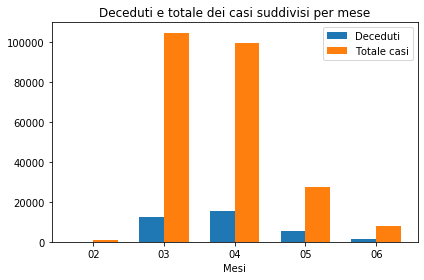

In [31]:
Graphics.bar(total_covid_df)

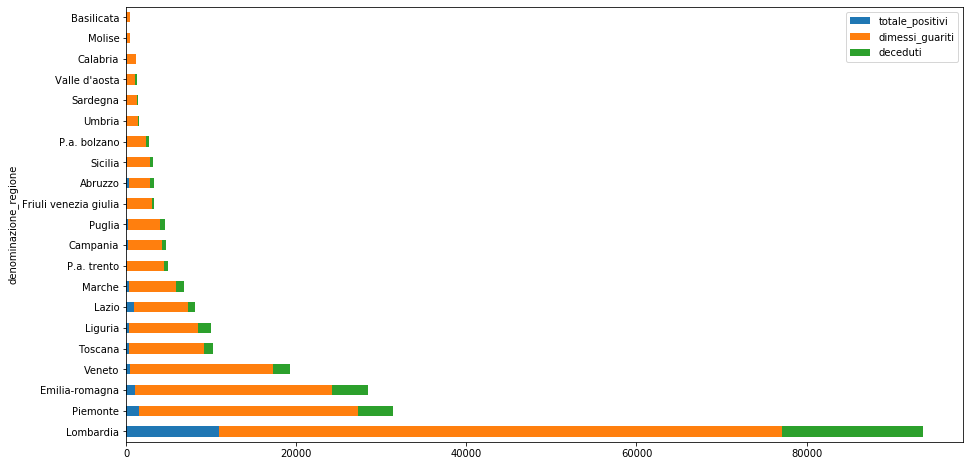

In [32]:
Graphics.barh(total_covid_df)

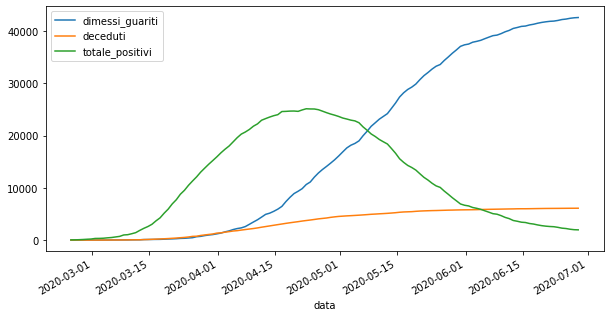

In [33]:
Graphics.line(regioni_df)

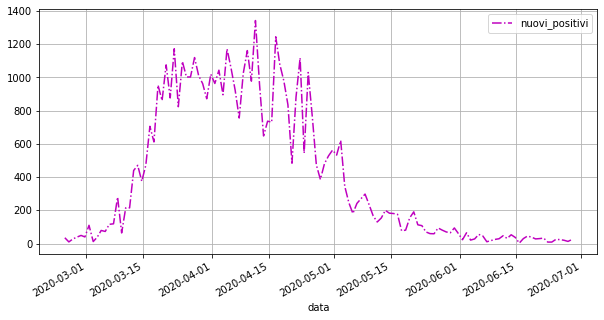

In [34]:
Graphics.line_nuovi_positivi(regioni_df)

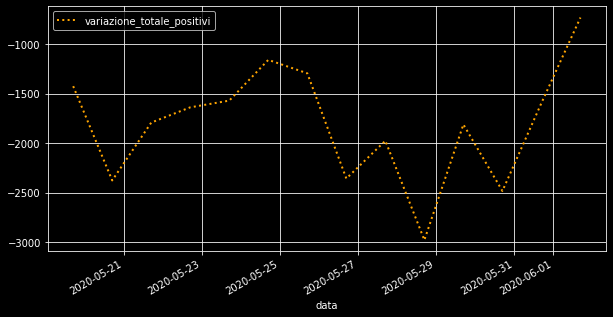

In [35]:
Graphics.line_variazione_totale_positivi(periodo_df)

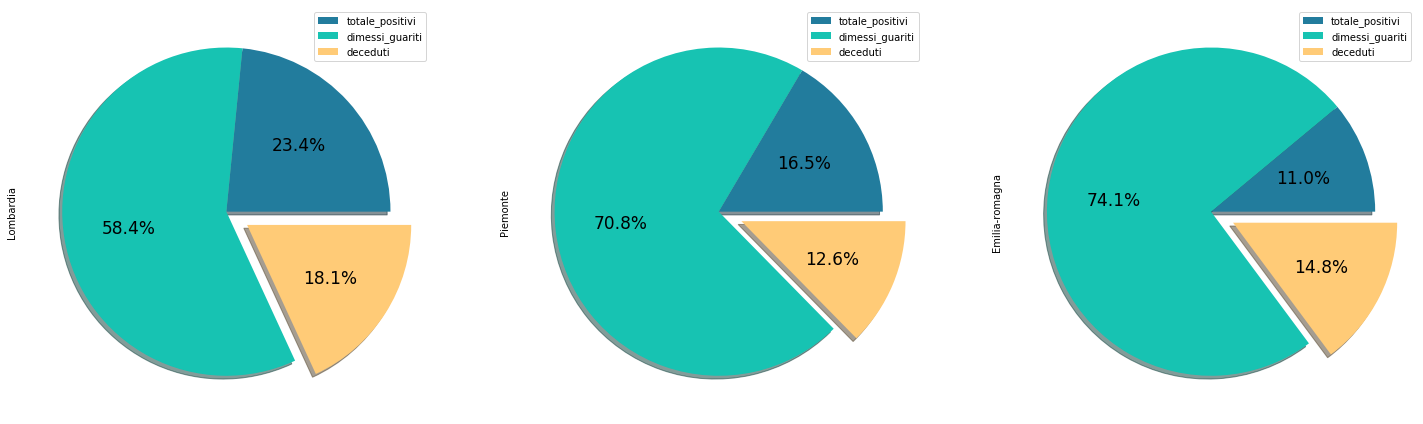

In [36]:
Graphics.pie_three_most_affected_regions(periodo_df)

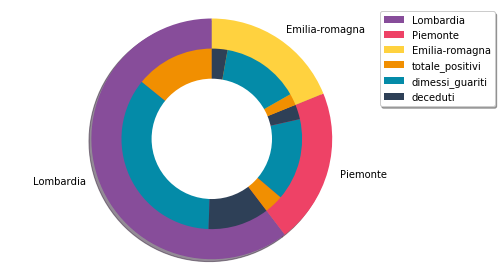

In [37]:
Graphics.nested_pie_three_most_affected_regions(periodo_df)

Questi ultmi due metodi per la realizzazione di grafici, se ricevono in input un dataframe con meno di 3 regioni resituiranno un errore

In [38]:
Graphics.pie_three_most_affected_regions(regioni_df)

NotEnoughRegionsError: Not enough Regions available in the dataframe! Please use another dataframe

In [39]:
Graphics.nested_pie_three_most_affected_regions(regioni_df)

NotEnoughRegionsError: Not enough Regions available in the dataframe! Please use another dataframe